In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.tseries.offsets import Day


In [2]:
fpath = './data/ap-northeast-1.csv'
df = pd.read_csv(fpath, header=None, names=['arch', 'os', 'source', 'val'], index_col=0, parse_dates=True).sort_index()


In [3]:
df = df[(df['os'] == 'Windows') & (df['arch'].str.startswith('i'))]
print(df['os'].unique())
print(df['arch'].unique())

['Windows']
['i2.xlarge' 'i2.8xlarge' 'i3.xlarge' 'i2.4xlarge' 'i3.large' 'i3.2xlarge'
 'i3.4xlarge' 'i2.2xlarge' 'i3.8xlarge' 'i3.16xlarge']


In [4]:
# функция для правильной сортровки списка с архитектурами от меньшего к большему
def sort_key(x):
    k1, k2 = x.split('.', maxsplit=1)
    k_dig, k_str = ['0'], []
    for c in list(k2):
        if c.isdigit():
            k_dig.append(c)
        else:
            k_str.append(c)
    return [k1, int(''.join(k_dig)), ''.join(k_str)]
    

In [5]:
arch = sorted(df['arch'].unique(), key=sort_key)
arch

['i2.xlarge',
 'i2.2xlarge',
 'i2.4xlarge',
 'i2.8xlarge',
 'i3.large',
 'i3.xlarge',
 'i3.2xlarge',
 'i3.4xlarge',
 'i3.8xlarge',
 'i3.16xlarge']

In [6]:
day = df.index.min()
days = [day]
while day < df.index[-1]:
    day += Day()
    days.append(day)

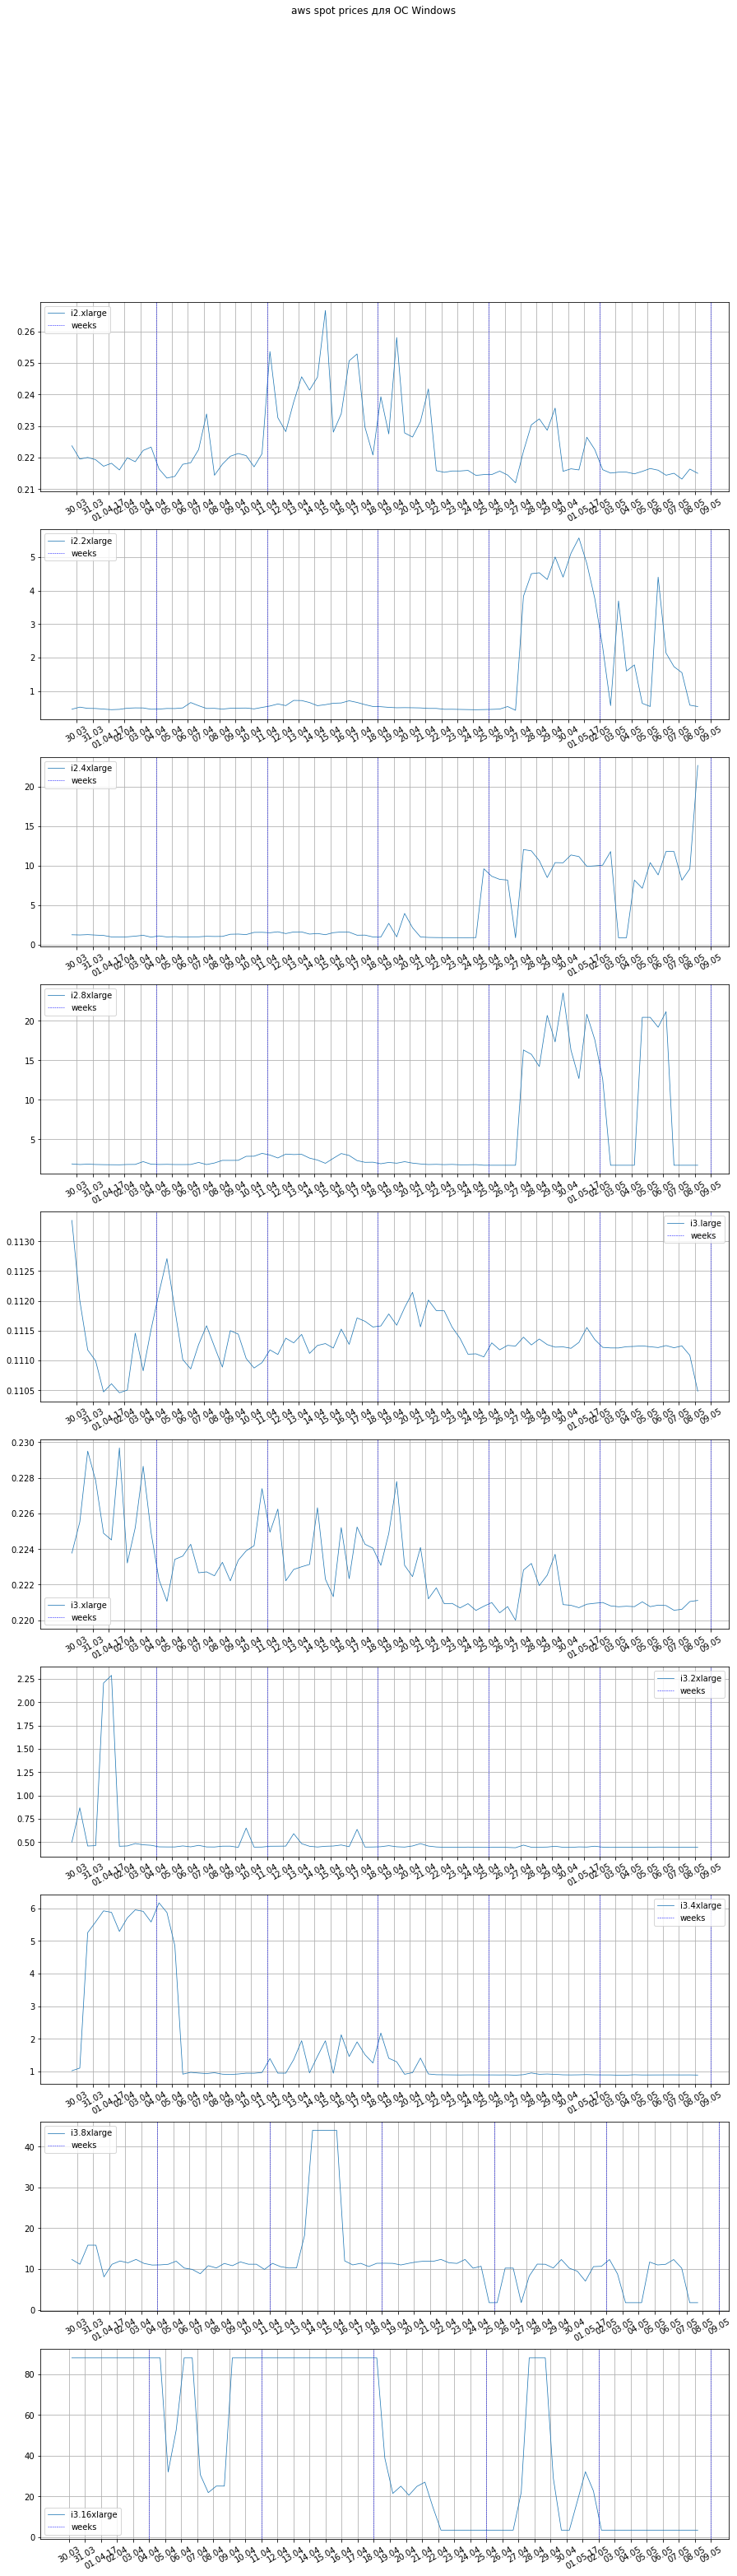

In [7]:
ax_row, ax_col = len(arch), 1
fig, axs = plt.subplots(nrows=ax_row, ncols=ax_col, figsize=(15, 5*ax_row ))
for i, ax in enumerate(axs):
    df_tmp = df[df['arch'] == arch[i]]
    df_tmp = df_tmp.resample('12H').mean().fillna(method="bfill")
    ax.plot(df_tmp.index, df_tmp['val'], label=arch[i], linewidth=0.75)
    ax.set_xticks(days)
    ax.set_xticklabels([d.strftime('%d.%m.%y' if d.is_month_start else '%d.%m') for d in days], rotation=30)
    weeks = [d for d in days if d.dayofweek==1]
    for d in weeks:
       vl = ax.axvline(d, ls='--', color='b', lw=0.5)
    vl.set_label('weeks')
    ax.legend(loc='best')
    ax.grid(True)

plt.suptitle('aws spot prices для ОС Windows')
plt.show()